In [14]:
import ehrdata as ed
import numpy as np
import pandas as pd
from ehrdata.core.constants import DEFAULT_TEM_LAYER_NAME

import ehrapy as ep

In [15]:
%load_ext autoreload
%autoreload 2

current_notebook_dir = %pwd
_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
edata = ed.dt.ehrdata_blobs(
    n_variables=4,
    n_observations=10,
    base_timepoints=100,
    layer=DEFAULT_TEM_LAYER_NAME,
)

edata.var.index = ["feature1", "feature2", "feature3", "feature4"]
edata.obs["subject_id"] = [f"patient{i}" for i in range(1, edata.n_obs + 1)]

In [20]:
edata.obs

,cluster,subject_id
0,2,patient1
1,0,patient2
2,0,patient3
3,0,patient4
4,0,patient5
5,3,patient6
6,2,patient7
7,3,patient8
8,1,patient9
9,3,patient10


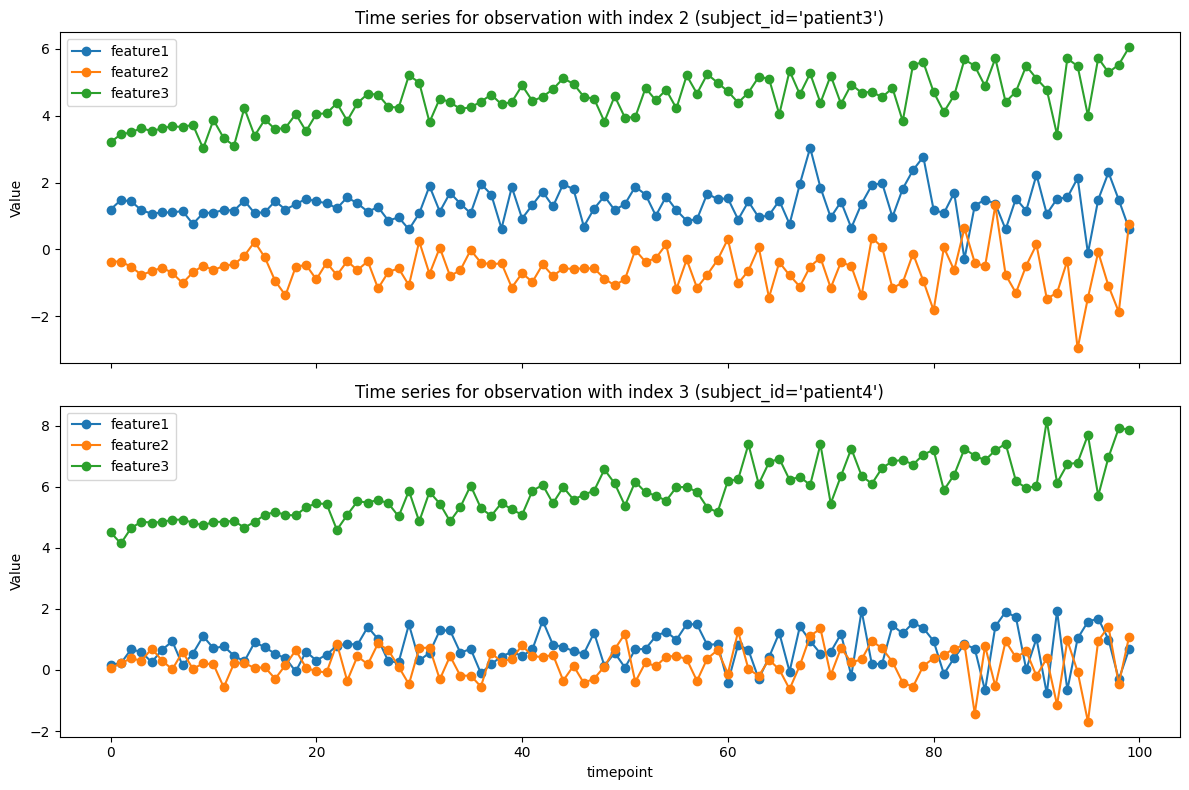

In [37]:
# timeseries of multiple observations in subplots
ax3 = ep.pl.plot_timeseries(
    edata,
    obs_id=["patient3", "patient4"],
    keys=["feature1", "feature2", "feature3"],
    obs_id_key="subject_id",
    layer=DEFAULT_TEM_LAYER_NAME,
    tem_time_key="timepoint",
    show=False,
)
ax3[0].figure.savefig(f"{_TEST_IMAGE_PATH}/plot_timeseries_multiple_obs_subplots_expected.png", dpi=80)

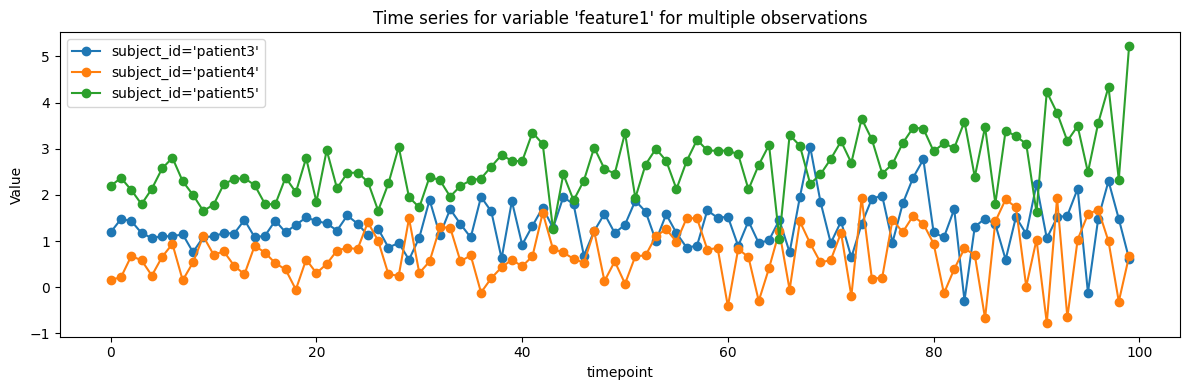

In [36]:
# timeseries of multiple observations in one plot
ax4 = ep.pl.plot_timeseries(
    edata,
    obs_id=["patient3", "patient4", "patient5"],
    keys="feature1",
    obs_id_key="subject_id",
    layer=DEFAULT_TEM_LAYER_NAME,
    tem_time_key="timepoint",
    overlay=True,
    show=False,
)

ax4.figure.savefig(f"{_TEST_IMAGE_PATH}/plot_timeseries_overlay_expected.png", dpi=80)